In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_trts,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom
0,0:00:58,100,100000,0.219526,0.030226,0.008745,0.007813,0.051345,0.010005,0.248121,...,0.683747,0.553065,49.987518,13.105621,0.437831,0.355995,1.196976,0.046120,0.0,0.00495
1,0:01:29,200,100000,0.081959,0.004963,0.070576,0.004772,0.115214,0.017196,0.722464,...,0.483496,0.555910,20.904404,1.729432,0.205839,0.167677,0.225644,0.024591,0.0,0.00995
2,0:02:01,300,100000,0.040274,0.025595,0.054632,0.002567,0.092129,0.027533,0.520760,...,0.451547,0.117818,29.758263,6.242355,0.164734,0.147121,0.697476,0.012653,0.0,0.01495
3,0:02:34,400,100000,0.120028,0.006043,0.033348,0.022265,0.167564,0.034246,0.604815,...,0.367057,0.302514,8.124716,3.807592,0.122624,0.103287,0.158929,0.022499,0.0,0.01995
4,0:03:05,500,100000,0.034435,0.007487,0.066070,0.002326,0.031491,0.023601,0.523728,...,0.252083,0.512852,10.182288,3.373141,0.174554,0.150378,0.179742,0.015568,0.0,0.02495


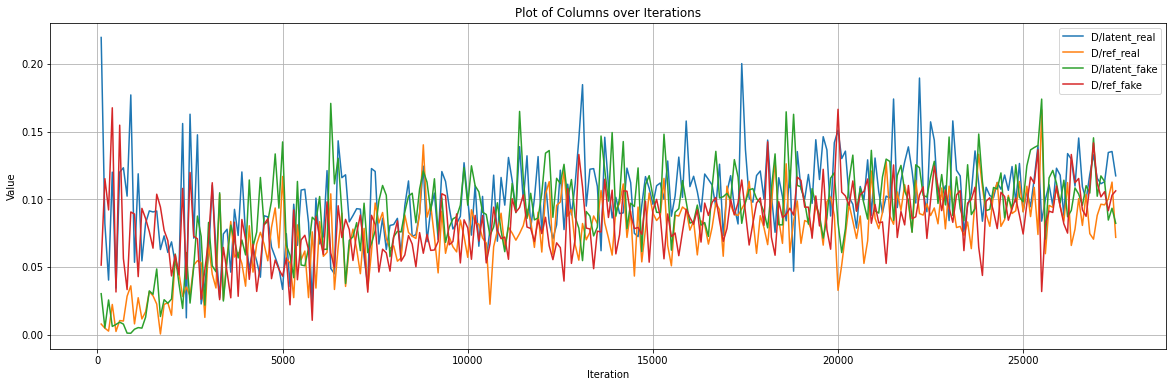

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

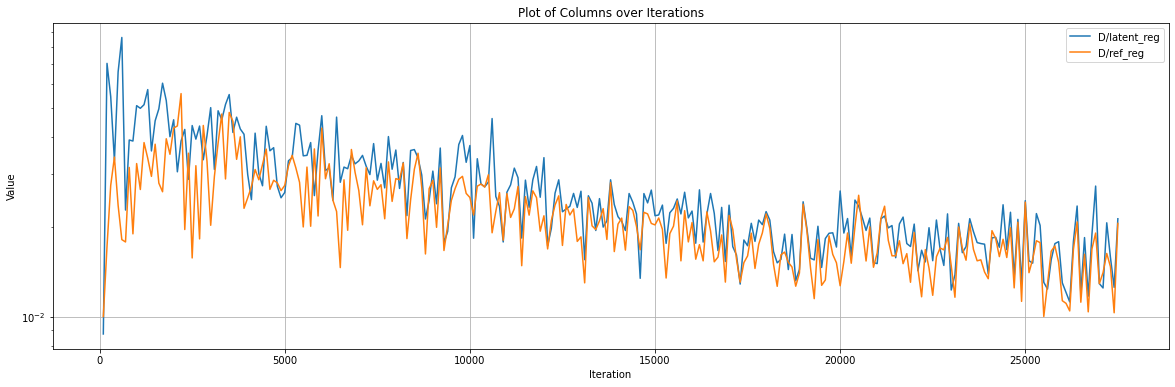

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

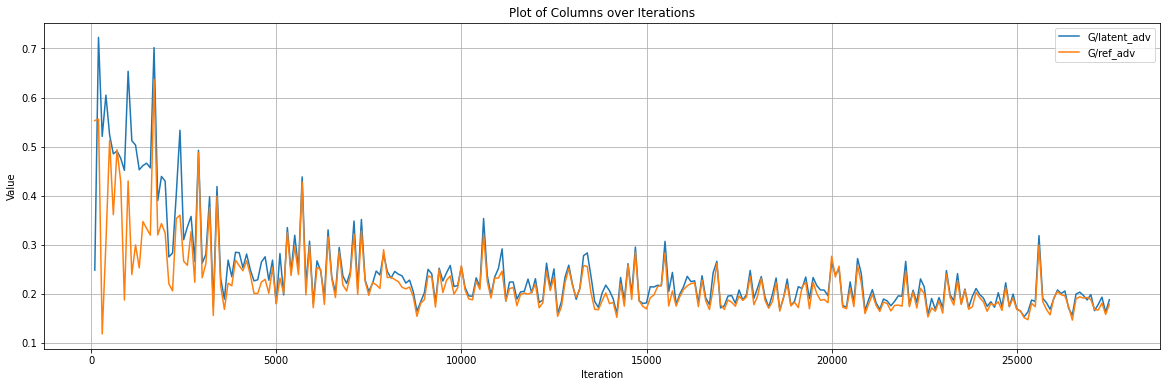

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

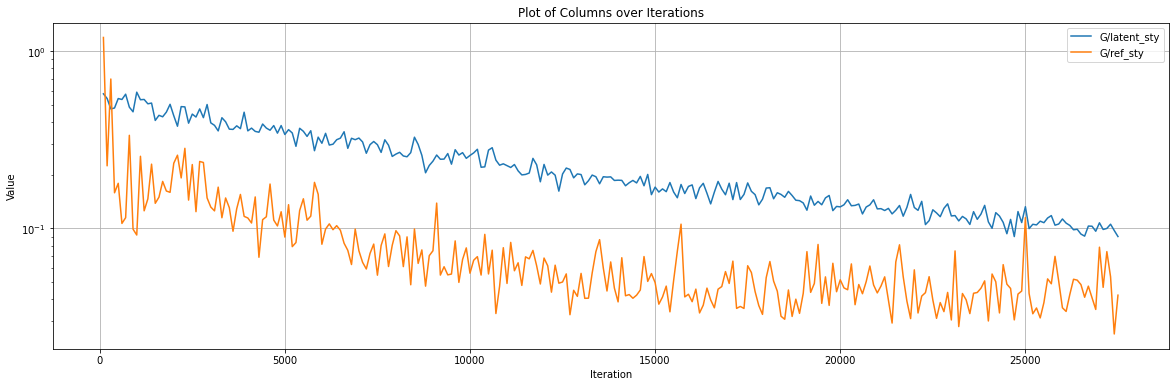

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

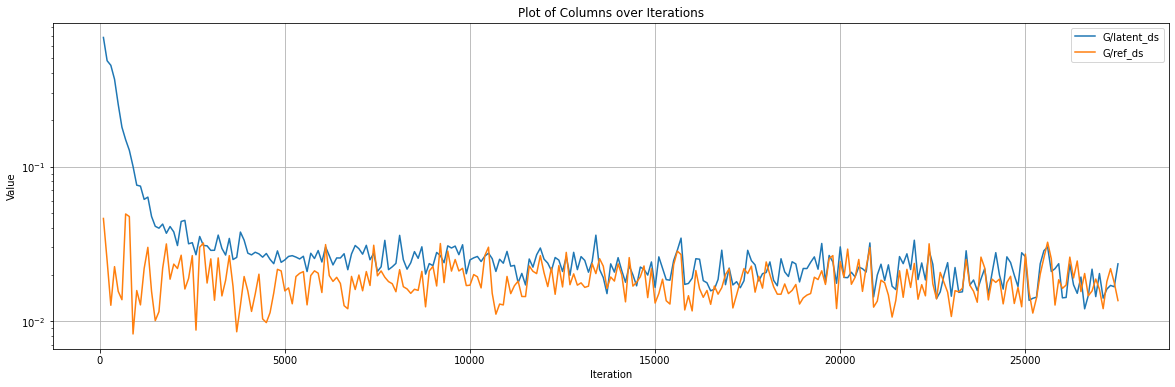

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

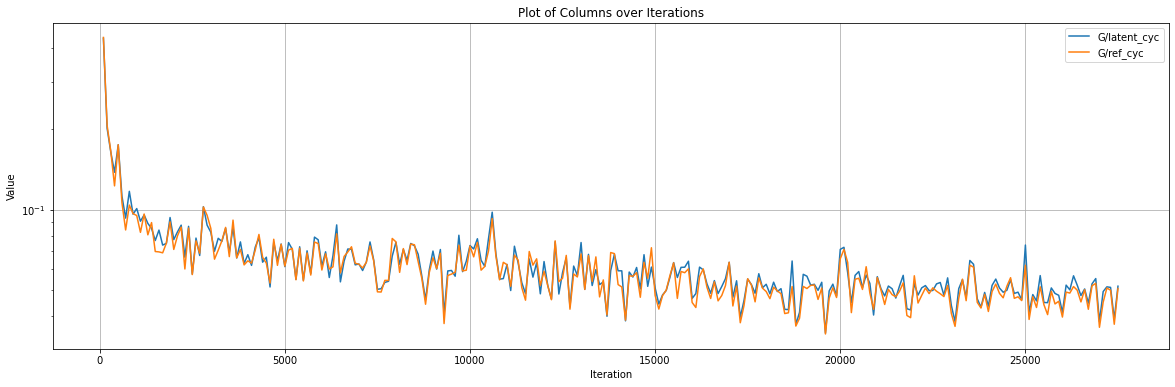

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

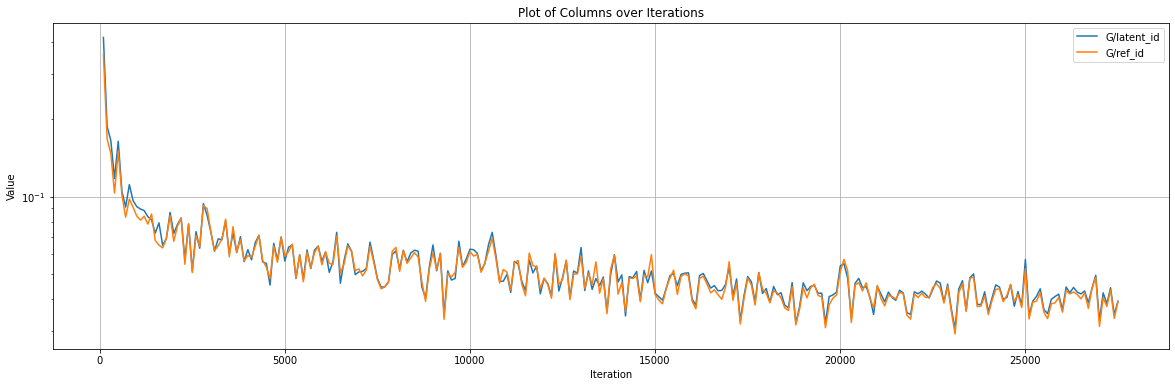

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

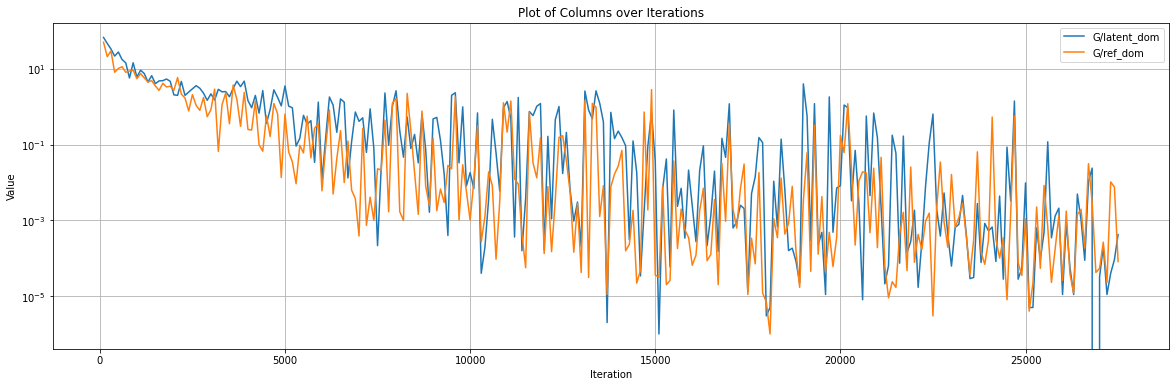

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

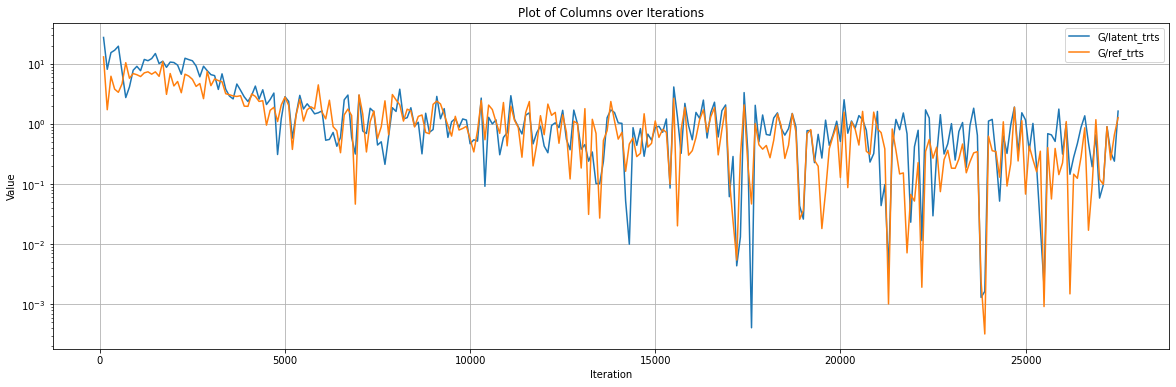

In [12]:
plot_columns(history, ['G/latent_trts', 'G/ref_trts'], logaxis=True)

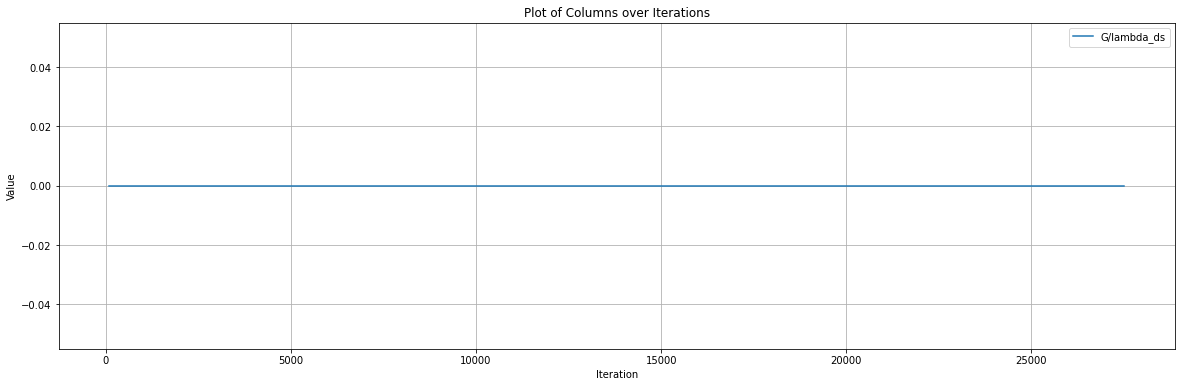

In [13]:
plot_columns(history, ['G/lambda_ds'])

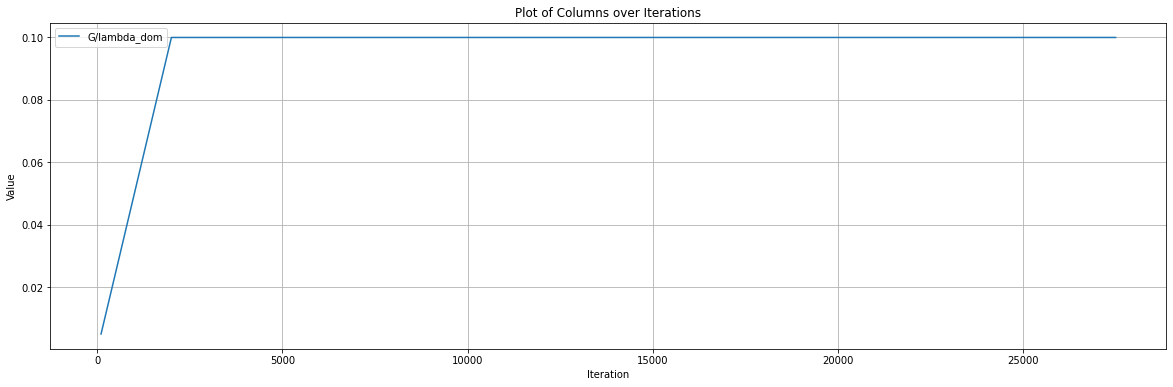

In [20]:
plot_columns(history, ['G/lambda_dom'])

# Metrics

In [14]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,target,domain,accuracy,loss
0,2000,latent,WAL,CLU,10,0.355662,5.691852
1,2000,latent,WAL,CLU,11,0.330537,6.651314
2,2000,latent,WAL,CLU,12,0.358108,6.754979
3,2000,latent,WAL,CLU,13,0.203593,5.663227
4,2000,latent,WAL,CLU,14,0.345638,7.037776


Maximum accuracy for CLD in latent mode: 0.8888 at step 16000
Maximum accuracy for CLU in latent mode: 0.8304 at step 18000
Maximum accuracy for RUN in latent mode: 0.7007 at step 20000
Maximum accuracy for WAL in latent mode: 0.9340 at step 14000


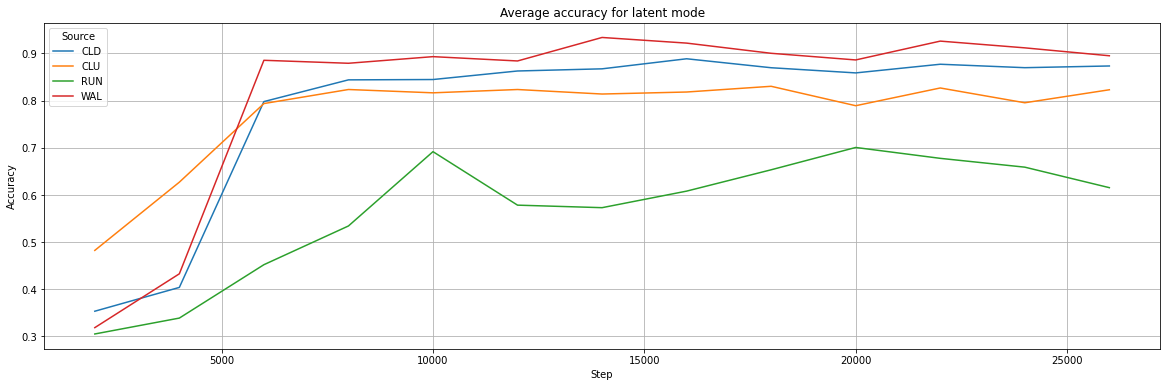

Maximum accuracy for CLD in reference mode: 0.9077 at step 12000
Maximum accuracy for CLU in reference mode: 0.8069 at step 24000
Maximum accuracy for RUN in reference mode: 0.7827 at step 26000
Maximum accuracy for WAL in reference mode: 0.9075 at step 18000


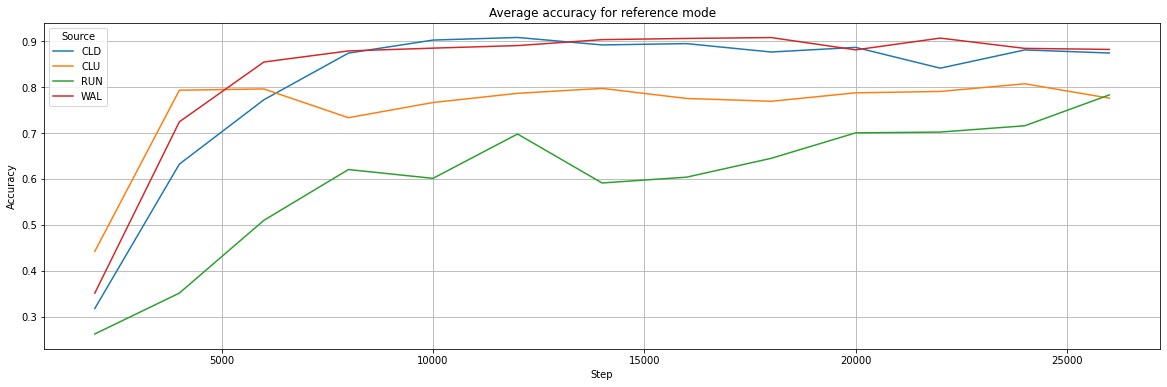

Minimum loss for CLD in latent mode: 0.6017 at step 12000
Minimum loss for CLU in latent mode: 0.6454 at step 6000
Minimum loss for RUN in latent mode: 1.2955 at step 20000
Minimum loss for WAL in latent mode: 0.2839 at step 10000


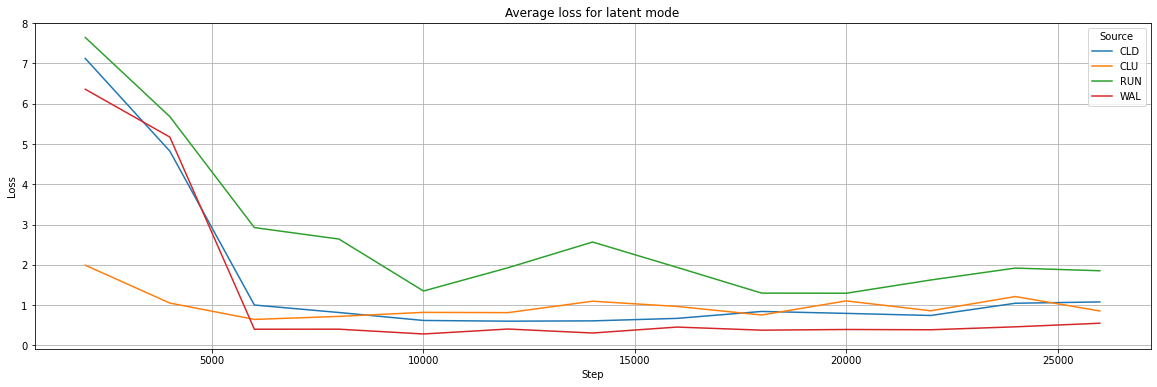

Minimum loss for CLD in reference mode: 0.5132 at step 12000
Minimum loss for CLU in reference mode: 0.7490 at step 4000
Minimum loss for RUN in reference mode: 0.9265 at step 26000
Minimum loss for WAL in reference mode: 0.3729 at step 14000


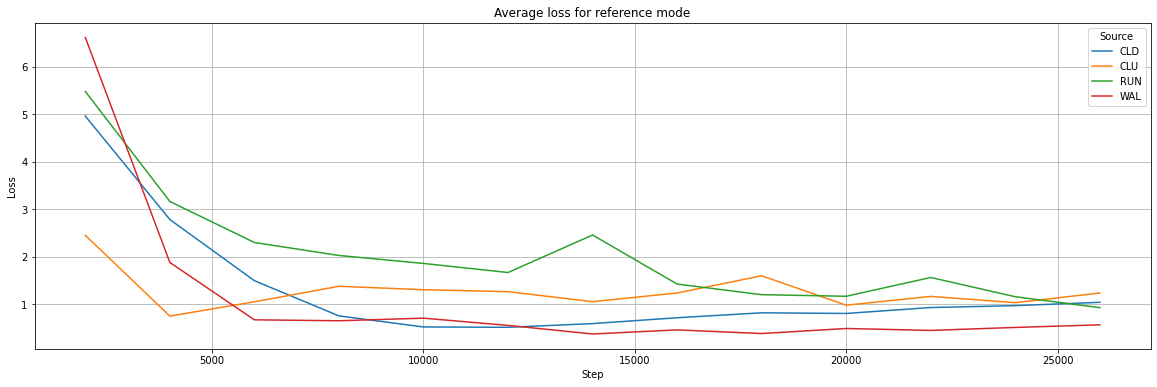

In [15]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for CLD: 0.8915 at step 16000
Maximum accuracy for CLU: 0.8086 at step 22000
Maximum accuracy for RUN: 0.7005 at step 20000
Maximum accuracy for WAL: 0.9185 at step 14000


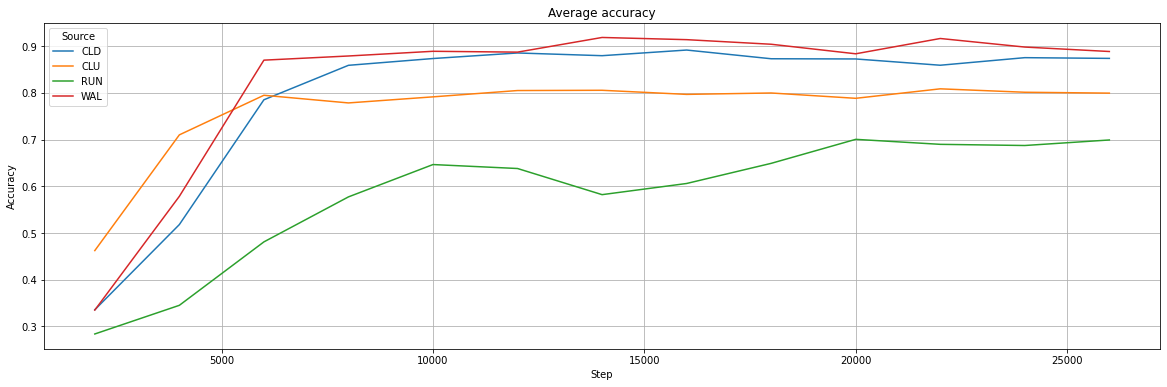

Minimum loss for CLD: 0.5574 at step 12000
Minimum loss for CLU: 0.8476 at step 6000
Minimum loss for RUN: 1.2309 at step 20000
Minimum loss for WAL: 0.3403 at step 14000


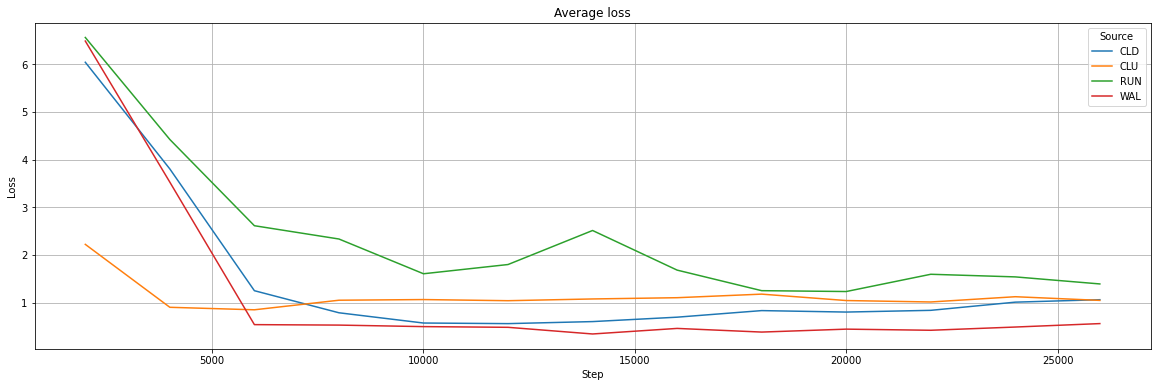

In [16]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.8270 at step 22000
Max in reference mode: 0.8285 at step 26000


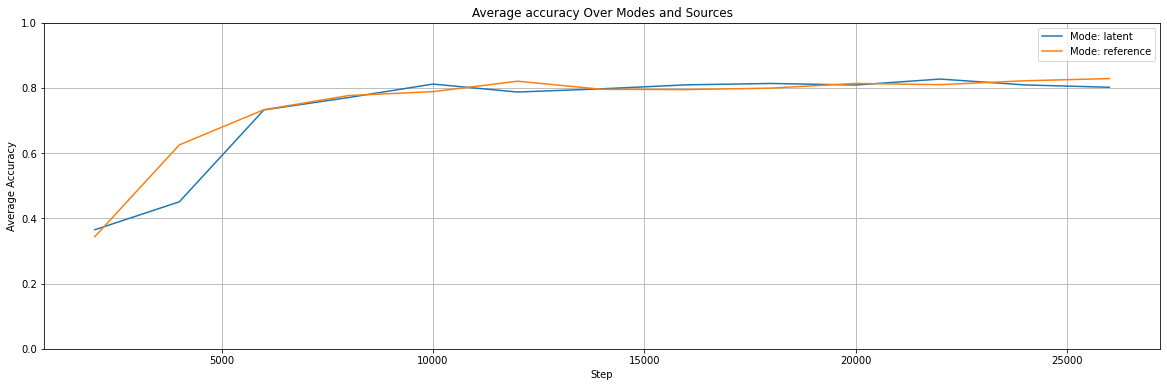

Min in latent mode: 0.7685 at step 10000
Min in reference mode: 0.8594 at step 20000


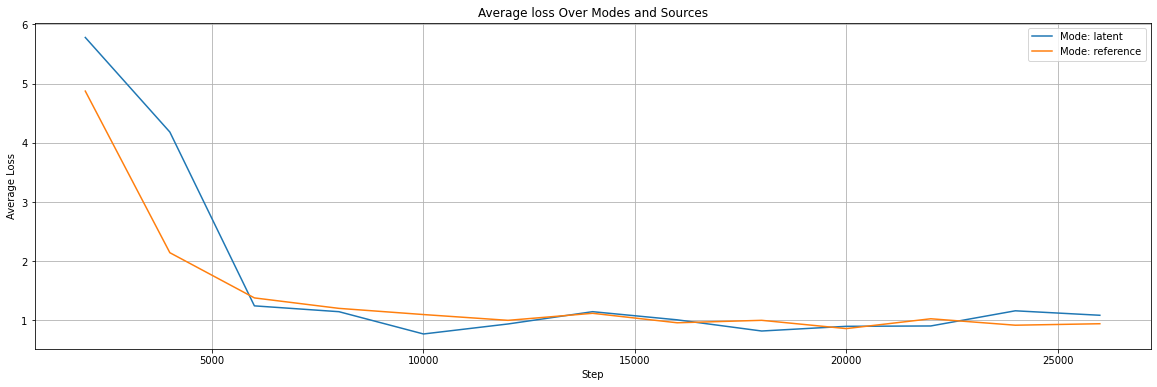

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

In [18]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,2000,latent,WAL,RUN,0.231777,4.689003
1,2000,latent,WAL,CLD,0.213759,4.393261
2,2000,latent,WAL,CLU,0.230139,5.600538
3,2000,latent,RUN,WAL,0.162285,4.734757
4,2000,latent,RUN,CLD,0.193110,4.451207


Maximum accuracy in latent mode: 0.3298 at step 24000


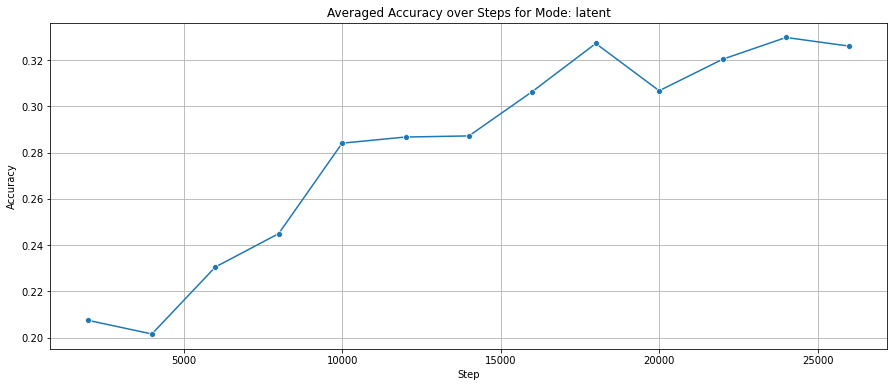

Maximum accuracy in reference mode: 0.3210 at step 24000


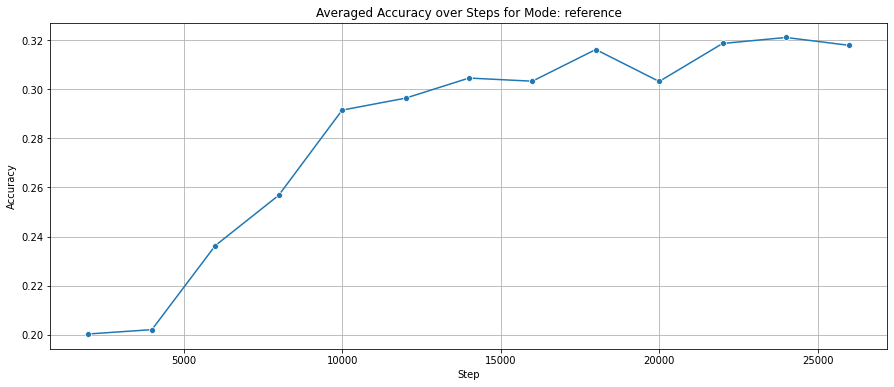

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')